In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

/mnt/kauffman/nbserver/jupyter-run-software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/mnt/kauffman/nbserver/jupyter-run-software/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
DR_ES = pd.read_csv('data/slam_seq.csv', sep=';')

cast = pd.read_pickle('data/SS3_cast_UMIs_mESC_ML.pkl')

cast = cast[cast[1]][0]

cast = cast[~cast.index.duplicated(keep='first')]

DR_ES.index = DR_ES['Name']

DR_ES = DR_ES[~DR_ES.index.duplicated(keep='first')]

DR_ES = DR_ES.dropna(how='any')

DR_ES['decay'] = np.log(2)/DR_ES['Half-life (h)']

bf = pd.Series([gene[0] for gene in cast], index=cast.index)

DR_ES_scRNA = DR_ES.reindex(cast.index)

decay_ES = DR_ES_scRNA['decay']
decay_ES = decay_ES.replace([np.inf, 0], np.nan).dropna()
decay_ES = decay_ES[~decay_ES.index.duplicated(keep='first')]
decay_ES = decay_ES[decay_ES > 0]
decay_ES = decay_ES.dropna()

SpearmanrResult(correlation=0.8429552739198909, pvalue=0.0)


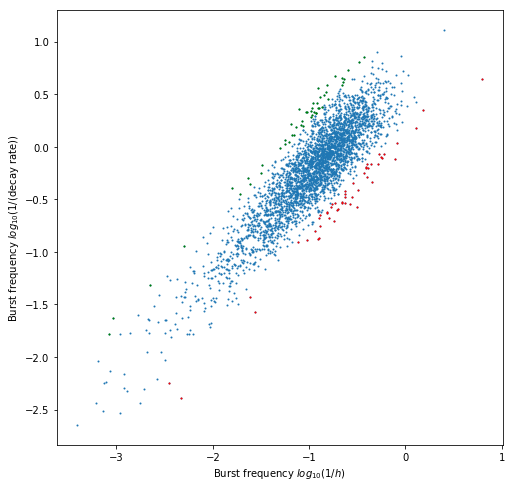

In [3]:
plt.figure(figsize=(8,8))
bf_absolute = np.log10((bf*decay_ES).dropna())
bf_relative = np.log10(bf[decay_ES.index].dropna())
plt.scatter(bf_absolute,bf_relative , s=1)
plt.scatter(bf_absolute[np.argsort(decay_ES[bf_relative.index])[:50]], bf_relative[np.argsort(decay_ES[bf_relative.index])[:50]], s=1, color='green')
plt.scatter(bf_absolute[np.argsort(decay_ES[bf_relative.index])[-50:]], bf_relative[np.argsort(decay_ES[bf_relative.index])[-50:]], s=1, color='red')
print(spearmanr(bf_absolute,bf_relative))
plt.xlabel(r'Burst frequency $log_{10}(1/h)$')
plt.ylabel(r'Burst frequency $log_{10}(1/$(decay rate))')
plt.savefig('figures/Fig1e.pdf')
plt.show()

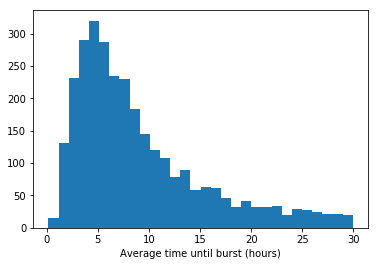

In [4]:
plt.hist(1/10**bf_absolute[1/10**bf_absolute < 30], bins=30)
plt.xlabel('Average time until burst (hours)')
plt.savefig('figures/Fig1f.pdf')
plt.show()